# Import Packages

In [1]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# Load the data

In [2]:
clean_df,data=read_data('portfolio_data.csv',debug=True)

        Date        AMZN        DPZ         BTC       NFLX
0   5/1/2013  248.229996  51.190983  106.250000  30.415714
1   5/2/2013  252.550003  51.987320   98.099998  30.641428
2   5/3/2013  258.049988  52.446388  112.900002  30.492857
3   5/6/2013  255.720001  53.205257  109.599998  30.098572
4   5/7/2013  257.730011  54.151505  113.199997  29.464285
5   5/8/2013  258.679993  54.385727  112.800003  29.801428
6   5/9/2013  260.160004  54.020340  117.699997  30.915714
7  5/10/2013  263.630005  54.357620  115.639999  31.098572
8  5/13/2013  264.510010  54.573097  111.400002  32.768570
9  5/14/2013  268.329987  55.275757  114.220001  33.424286
----------------------------------------------------
        Date        AMZN
0 2013-05-01  248.229996
1 2013-05-02  252.550003
2 2013-05-03  258.049988
3 2013-05-06  255.720001
4 2013-05-07  257.730011
5 2013-05-08  258.679993
6 2013-05-09  260.160004
7 2013-05-10  263.630005
8 2013-05-13  264.510010
9 2013-05-14  268.329987


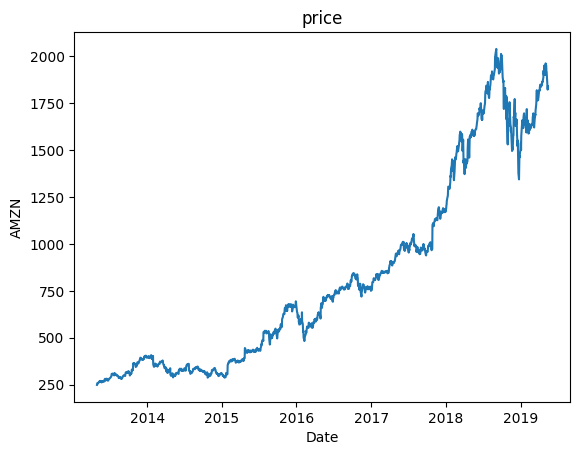

In [3]:
plot_data(clean_df["AMZN"], title="price", x_label="Date", y_label="AMZN")

In [5]:
def prepare_train_test_data(data, time_step_in, time_step_out, test_size=0.2):
    X, Y = create_dataset(data, time_step_in, time_step_out)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

    # Separate scalers for X and Y
    scaler_X = MinMaxScaler(feature_range=(0,1))
    scaler_Y = MinMaxScaler(feature_range=(0,1))
    x_train = scaler_X.fit_transform(X_train)
    y_train = scaler_Y.fit_transform(Y_train)
    x_test = scaler_X.transform(X_test)
    y_test = scaler_Y.transform(Y_test)

    print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
    
    return x_train, x_test, y_train, y_test, scaler_X, scaler_Y
x_train, x_test, y_train, y_test, scaler_X, scaler_Y = prepare_train_test_data(data, time_step_in=20, time_step_out=7, test_size=0.2)

x_train shape: (1194, 20), y_train shape: (1194, 7), x_test shape: (299, 20), y_test shape: (299, 7)


In [7]:
dense_model_2=Sequential()
dense_model_2.add(Dense(512,input_shape=(20,),activation="relu"))
dense_model_2.add(Dense(256,activation="relu"))
dense_model_2.add(Dense(128,activation="relu"))
dense_model_2.add(Dense(256,activation="relu"))
dense_model_2.add(Dense(128,activation="relu"))
dense_model_2.add(Dense(7))
dense_model_2.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.0001), metrics=['mean_absolute_error'])
dense_model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,799 (944.53 KB)

 Trainable params: 241,799 (944.53 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_1= dense_model_2.fit(
    x_train,y_train,
    epochs=100,              
    validation_data=(x_test,y_test),  
    verbose=1  
)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - val_loss: 0.1036 - val_mean_absolute_error: 0.1036
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - val_loss: 0.0205 - val_mean_absolute_error: 0.0205
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - val_loss: 0.0172 - val_mean_absolute_error: 0.0172
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - val_loss: 0.0153 - val_mean_absolute_error: 0.0153
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - val_loss

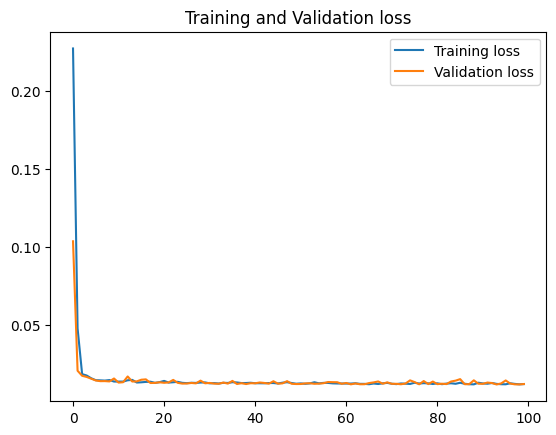

In [9]:
history_plot(history_1)

In [10]:
result =dense_model_2.evaluate(x_test, y_test)
y_pred = dense_model_2.predict(x_test) 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 - mean_absolute_error: 0.0120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [11]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: [0.011917207390069962, 0.011917207390069962]
Test MAPE: 0.07126495436310022
Test Accuracy: 0.9287350456368998


In [12]:
all_predictions = []
input_window = x_test[-1]  

for i in range(1, 6): 
    print(f'Step {i} ==> Input Window: {input_window}')
    
    y_temp = dense_model_2.predict(input_window.reshape(1, -1))
    print(f"Prediction Output (y_temp): {y_temp}")
    all_predictions.extend(y_temp[0])  # Add all predicted values from y_temp to the list
    input_window = np.roll(input_window, -1, axis=0)
    input_window[-1] = y_temp[0][0] 

Step 1 ==> Input Window: [0.7660632  0.74978735 0.75809372 0.75869915 0.75496415 0.75406413
 0.73957343 0.74561953 0.75376306 0.7383576  0.74459573 0.74231201
 0.75382079 0.76593155 0.75848395 0.76001394 0.76677524 0.76943586
 0.77566265 0.78903934]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Prediction Output (y_temp): [[0.7948879  0.797208   0.7981277  0.78409225 0.7971998  0.8014945
  0.80997616]]
Step 2 ==> Input Window: [0.74978735 0.75809372 0.75869915 0.75496415 0.75406413 0.73957343
 0.74561953 0.75376306 0.7383576  0.74459573 0.74231201 0.75382079
 0.76593155 0.75848395 0.76001394 0.76677524 0.76943586 0.77566265
 0.78903934 0.7948879 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction Output (y_temp): [[0.8023772  0.8042319  0.80547076 0.7912514  0.8065306  0.8099934
  0.81909686]]
Step 3 ==> Input Window: [0.75809372 0.75869915 0.75496415 0.75406413 0.73957343 0.74561953
 0.75376306 0.7383576  0.74459573 0.74231201 0.75382079 0.76593155
 0.75848395 0.76001394 0.76677524 0.76943586 0

In [16]:
num_samples = len(all_predictions)//7
all_predictions_array = np.array(all_predictions) 
all_predictions_reshaped = all_predictions_array.reshape(num_samples, 7)  
y_next_30 = scaler_Y.inverse_transform(all_predictions_reshaped)
y_next_30 = np.round(y_next_30)
y_next_30

array([[1676., 1659., 1681., 1657., 1680., 1688., 1703.],
       [1689., 1671., 1694., 1669., 1697., 1703., 1720.],
       [1698., 1678., 1702., 1678., 1706., 1711., 1728.],
       [1706., 1687., 1711., 1689., 1716., 1720., 1738.],
       [1715., 1694., 1718., 1695., 1726., 1730., 1746.]], dtype=float32)

In [17]:
x_test=scaler_X.inverse_transform(x_test)
x_train=scaler_X.inverse_transform(x_train)
x_test[-1]

array([1600.140015, 1592.390015, 1608.      , 1609.079956, 1602.910034,
       1601.540039, 1576.119995, 1587.280029, 1581.76001 , 1574.369995,
       1585.459961, 1581.400024, 1601.859985, 1603.069946, 1610.150024,
       1612.869995, 1624.890015, 1629.619995, 1641.540039, 1665.27002 ])

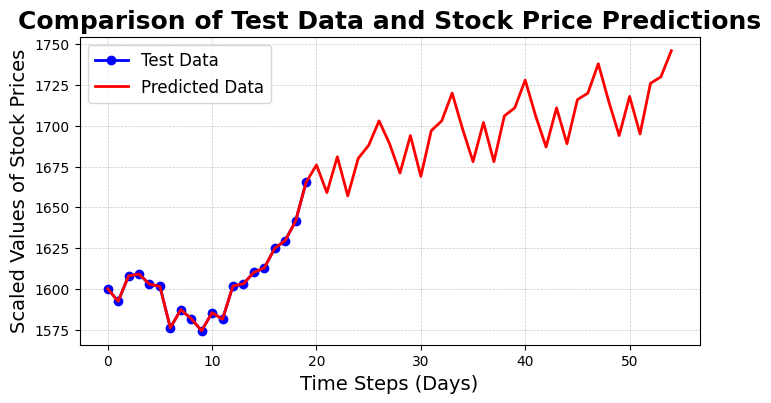

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(x_test[-1], label='Test Data', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red', linewidth=2, markersize=8)
plt.title('Comparison of Test Data and Stock Price Predictions', fontsize=18, fontweight='bold')
plt.xlabel('Time Steps (Days)', fontsize=14)
plt.ylabel('Scaled Values of Stock Prices', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [19]:
last_date = clean_df.index[-1]
last_20_days=np.round(x_test[-1])
print(f" the last 20 days till {last_date} : {last_20_days}\npredicted 30 days: {y_next_30.flatten().tolist()}")

 the last 20 days till 2019-05-14 00:00:00 : [1600. 1592. 1608. 1609. 1603. 1602. 1576. 1587. 1582. 1574. 1585. 1581.
 1602. 1603. 1610. 1613. 1625. 1630. 1642. 1665.]
predicted 30 days: [1676.0, 1659.0, 1681.0, 1657.0, 1680.0, 1688.0, 1703.0, 1689.0, 1671.0, 1694.0, 1669.0, 1697.0, 1703.0, 1720.0, 1698.0, 1678.0, 1702.0, 1678.0, 1706.0, 1711.0, 1728.0, 1706.0, 1687.0, 1711.0, 1689.0, 1716.0, 1720.0, 1738.0, 1715.0, 1694.0, 1718.0, 1695.0, 1726.0, 1730.0, 1746.0]
